In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('Mental Health Survey.csv', encoding='cp1252')

# Check the first few rows
print(df.head())


           Full Name College/University name Course/Stream      Year  \
0              Palak  Chandigarh University    Engineering  4th Year   
1    Sumanpreet Kaur  Chandigarh University    Engineering  4th Year   
2      Prateek Maan   Chandigarh University    Engineering  2nd Year   
3     Bhavyata Dass   Chandigarh University    Engineering  4th Year   
4  Krish khandelwal   Chandigarh University    Engineering  4th Year   

  Age Group  Gender  \
0   21 - 23  Female   
1   21 - 23  Female   
2   21 - 23    Male   
3   21 - 23  Female   
4   18 - 20    Male   

  How often do you feel stressed due to academic pressure?    \
0                                        Once a week           
1                                        Once a week           
2                                        Once a week           
3                                              Daily           
4                                              Daily           

   Stress Score (1 - 5)  \
0               

In [17]:
# Check for missing values
print(df.isnull().sum())

df_clean = df.dropna()


Full Name                                                                                                                            0
College/University name                                                                                                              0
Course/Stream                                                                                                                        0
Year                                                                                                                                 0
Age Group                                                                                                                            0
Gender                                                                                                                               0
How often do you feel stressed due to academic pressure?                                                                             0
Stress Score (1 - 5)                                   

In [18]:
# Only numeric columns
numeric_cols = df_clean.select_dtypes(include='number')

# Now compute mean, std, min, max
stats = numeric_cols.agg(['mean', 'std', 'min', 'max'])
print(stats)


      Stress Score (1 - 5)  Anxiety Score  \
mean              3.691667       1.308333   
std               1.221625       0.886840   
min               1.000000       0.000000   
max               5.000000       2.000000   

      How would you rate your overall mental health in the past month?\nâ†’ Linear scale (1 to 5)\n1 = Very Poor\n5 = Excellent    \
mean                                           2.850000                                                                             
std                                            1.267897                                                                             
min                                            1.000000                                                                             
max                                            5.000000                                                                             

      Counseling Score (1-2)  Sleep Hours  Time spend on social media/per day  \
mean                1.28333

In [20]:
import pandas as pd

# Take 10 samples from each gender
male_sample = df[df['Gender'] == 'Male'].sample(50, random_state=1)
female_sample = df[df['Gender'] == 'Female'].sample(50, random_state=1)

# Compute averages for each sample group
avg_scores_sample = pd.DataFrame({
    'Male': male_sample[['Stress Score (1 - 5)', 'Anxiety Score', 'Sleep Hours']].mean(),
    'Female': female_sample[['Stress Score (1 - 5)', 'Anxiety Score', 'Sleep Hours']].mean()
})

# Display result
print("Average Scores for Male and Female Students:")
print(avg_scores_sample)


Average Scores for Male and Female Students:
                      Male  Female
Stress Score (1 - 5)  3.76    3.72
Anxiety Score         1.40    1.30
Sleep Hours           5.92    6.36


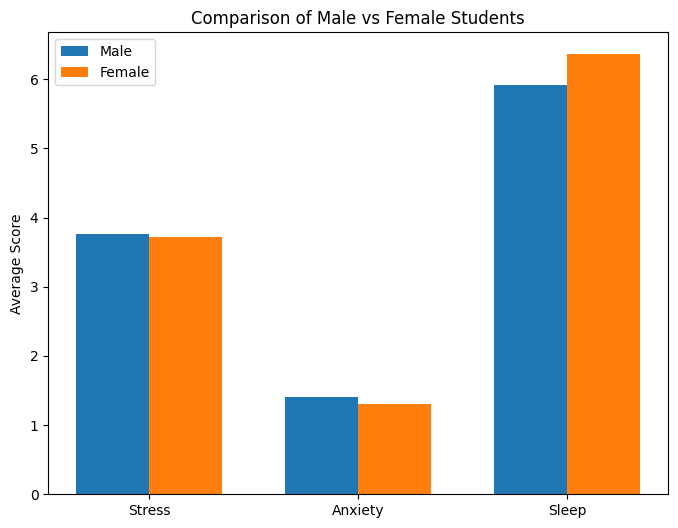

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Take 10 samples each
male_sample = df[df['Gender'] == 'Male'].sample(50, random_state=1)
female_sample = df[df['Gender'] == 'Female'].sample(50, random_state=1)

# Compute averages for selected students
avg_scores_sample = {
    'Male': male_sample[['Stress Score (1 - 5)', 'Anxiety Score', 'Sleep Hours']].mean(),
    'Female': female_sample[['Stress Score (1 - 5)', 'Anxiety Score', 'Sleep Hours']].mean()
}

# Convert to DataFrame for easier handling
avg_scores_sample = pd.DataFrame(avg_scores_sample)

# Metrics and values
metrics = ['Stress Score (1 - 5)', 'Anxiety Score', 'Sleep Hours']
x = np.arange(len(metrics))  # label locations

male_scores = avg_scores_sample['Male'].values
female_scores = avg_scores_sample['Female'].values

width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(8,6))

# Plot bars
ax.bar(x - width/2, male_scores, width, label='Male')
ax.bar(x + width/2, female_scores, width, label='Female')

# Labels and title
ax.set_ylabel('Average Score')
ax.set_title('Comparison of Male vs Female Students')
ax.set_xticks(x)
ax.set_xticklabels(['Stress', 'Anxiety', 'Sleep'])
ax.legend()

plt.show()


In [22]:
correlation_matrix = numeric_cols.corr(method='pearson')
print(correlation_matrix)


                                                    Stress Score (1 - 5)  \
Stress Score (1 - 5)                                            1.000000   
Anxiety Score                                                   0.476318   
How would you rate your overall mental health i...             -0.621479   
Counseling Score (1-2)                                          0.278882   
Sleep Hours                                                    -0.370680   
Time spend on social media/per day                             -0.021084   
Engagement in Physical activity                                -0.172607   

                                                    Anxiety Score  \
Stress Score (1 - 5)                                     0.476318   
Anxiety Score                                            1.000000   
How would you rate your overall mental health i...      -0.578822   
Counseling Score (1-2)                                   0.679344   
Sleep Hours                                   

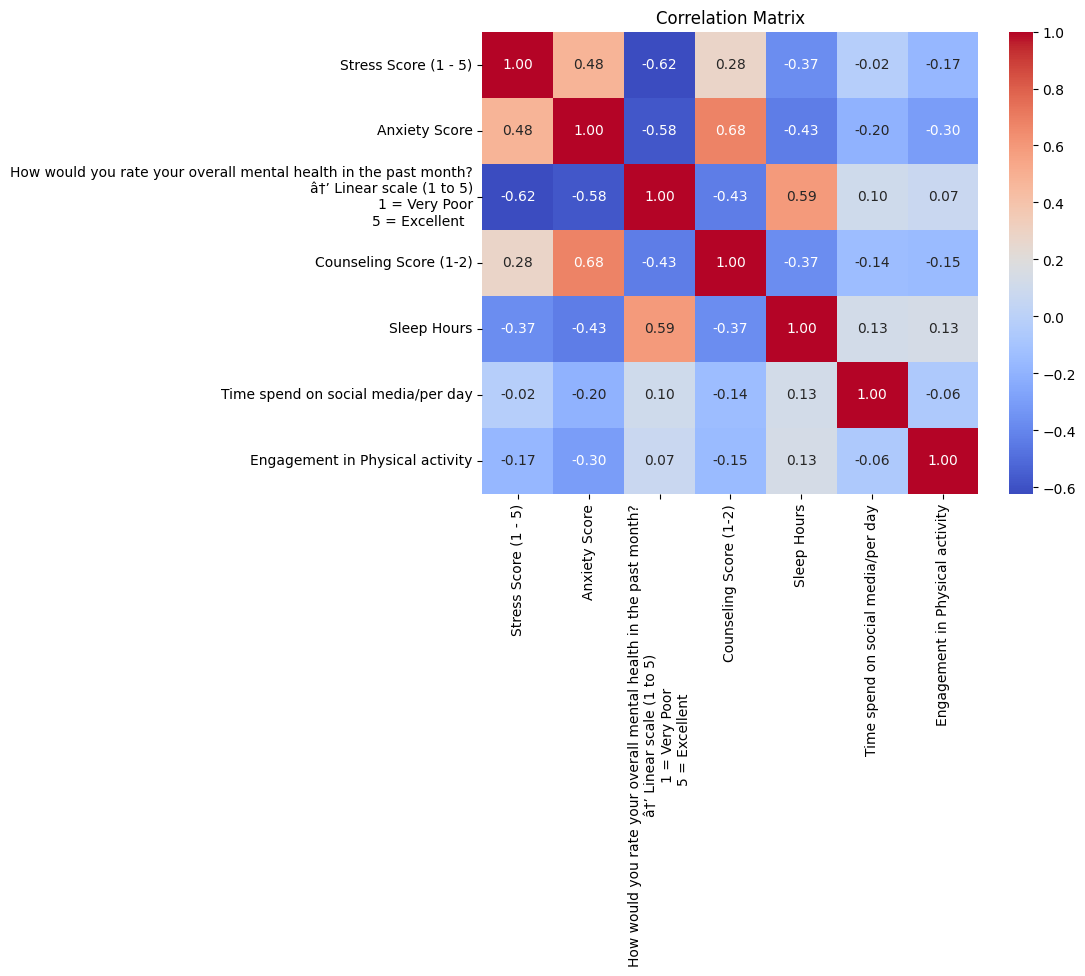

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [24]:
import pandas as pd
import numpy as np

def interpret_r(r):
    if r == 1:
        return "Perfect positive correlation"
    elif 0.7 <= r < 1:
        return "Strong positive correlation"
    elif 0.4 <= r < 0.7:
        return "Moderate positive correlation"
    elif 0.1 <= r < 0.4:
        return "Weak positive correlation"
    elif -0.1 < r < 0.1:
        return "No correlation"
    elif -0.4 < r <= -0.1:
        return "Weak negative correlation"
    elif -0.7 < r <= -0.4:
        return "Moderate negative correlation"
    elif -1 < r <= -0.7:
        return "Strong negative correlation"
    elif r == -1:
        return "Perfect negative correlation"

# Convert correlation matrix to long form
corr_long = correlation_matrix.stack().reset_index()
corr_long.columns = ['Parameter1', 'Parameter2', 'Pearson_r']

# Remove self-correlations and duplicate pairs
corr_long = corr_long[corr_long['Parameter1'] != corr_long['Parameter2']]
corr_long['Pair'] = corr_long['Parameter1'] + " ↔ " + corr_long['Parameter2']

# Remove duplicate pairs (A↔B and B↔A)
corr_long['sorted_pair'] = corr_long.apply(lambda row: " ↔ ".join(sorted([row['Parameter1'], row['Parameter2']])), axis=1)
corr_long = corr_long.drop_duplicates(subset='sorted_pair')

# Add interpretation
corr_long['Interpretation'] = corr_long['Pearson_r'].apply(interpret_r)

# Select final columns
final_table = corr_long[['Pair', 'Pearson_r', 'Interpretation']].reset_index(drop=True)

# Optional: round r to 2 decimals
final_table['Pearson_r'] = final_table['Pearson_r'].round(2)

# Display the final table
print(final_table)


                                                 Pair  Pearson_r  \
0                Stress Score (1 - 5) ↔ Anxiety Score       0.48   
1   Stress Score (1 - 5) ↔ How would you rate your...      -0.62   
2       Stress Score (1 - 5) ↔ Counseling Score (1-2)       0.28   
3                  Stress Score (1 - 5) ↔ Sleep Hours      -0.37   
4   Stress Score (1 - 5) ↔ Time spend on social me...      -0.02   
5   Stress Score (1 - 5) ↔ Engagement in Physical ...      -0.17   
6   Anxiety Score ↔ How would you rate your overal...      -0.58   
7              Anxiety Score ↔ Counseling Score (1-2)       0.68   
8                         Anxiety Score ↔ Sleep Hours      -0.43   
9   Anxiety Score ↔ Time spend on social media/per...      -0.20   
10    Anxiety Score ↔ Engagement in Physical activity      -0.30   
11  How would you rate your overall mental health ...      -0.43   
12  How would you rate your overall mental health ...       0.59   
13  How would you rate your overall mental healt

In [25]:
# Group by Academic Year and calculate mean Stress Score
avg_stress_by_year = df.groupby('Year')['Stress Score (1 - 5)'].mean().reset_index()

# Sort by Academic Year
avg_stress_by_year = avg_stress_by_year.sort_values('Year')

print(avg_stress_by_year)

       Year  Stress Score (1 - 5)
0  1st Year              3.800000
1  2nd Year              3.678571
2  3rd Year              3.000000
3  4th Year              4.130435
